# ENG4701-2 Faculty Final Year Project marks analysis
## Semester 1, 2021
Dr Daniel Duke, Department of Mechanical & Aerospace Engineering

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
A=np.genfromtxt("ENG4701 2022 S1 Progress Report and Final Submission Marking Progress.csv",skip_header=3,delimiter=',')
print("Data shape: "+str(A.shape))
print("Mean final ENG4701 = %g" % np.nanmean(A[:,3]))
print("Std  final ENG4701 = %g" % np.nanstd(A[:,3]))
print("")
print("Mean final ENG4702 = %g" % np.nanmean(A[:,6]))
print("Std  final ENG4702 = %g" % np.nanstd(A[:,6]))

Data shape: (795, 10)
Mean final ENG4701 = 74.3235
Std  final ENG4701 = 13.5099

Mean final ENG4702 = 73.7843
Std  final ENG4702 = 8.09224


### ENG4701 analysis

In [3]:
# Filter on non zero marks
flt=(A[:,0]>0)&(A[:,1]>0)&(A[:,2]>0)

In [4]:
# FULL STATS.
slope, intercept, r, p, se = scipy.stats.linregress( np.hstack((A[flt,0],A[flt,0])) ,\
                                                     np.hstack((A[flt,1],A[flt,2])) )

x = np.linspace(A[flt,0].min(),A[flt,0].max(),10)
y = slope*x + intercept

<IPython.core.display.Javascript object>


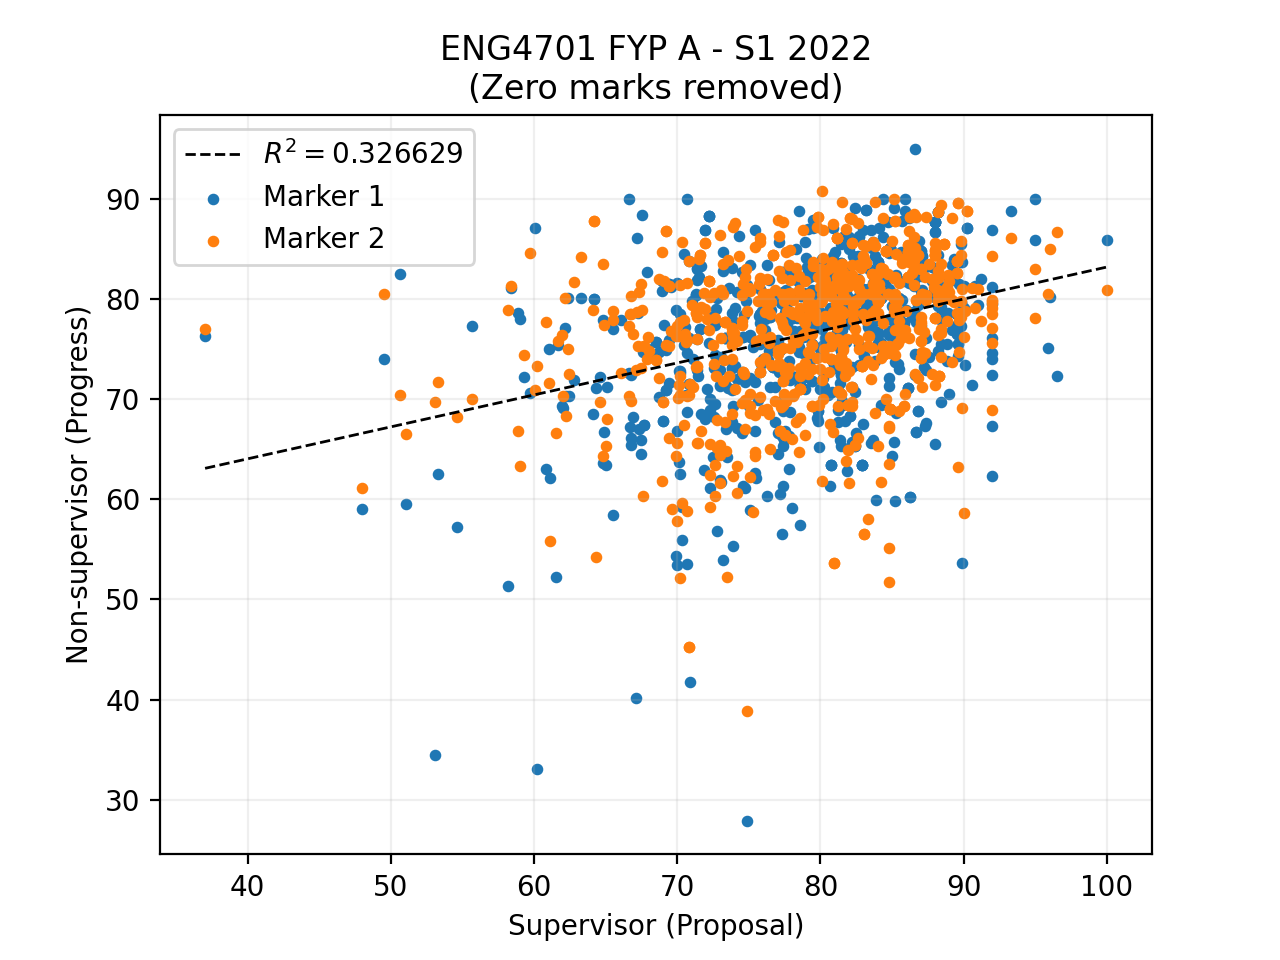

In [5]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
ax.scatter(A[flt,0],A[flt,1],label='Marker 1',s=10)
ax.scatter(A[flt,0],A[flt,2],label='Marker 2',s=10)
ax.plot(x,y,ls='--',c='k',lw=1,label='$R^2 = %f$' % r)
plt.xlabel('Supervisor (Proposal)')
plt.ylabel('Non-supervisor (Progress)')
plt.title("ENG4701 FYP A - S1 2022\n(Zero marks removed)")
plt.legend()
#plt.savefig("/Users/dduke/Desktop/ENG4701.png")
plt.show();

In [6]:
# CROSS MARKER STATS.
fltc=(A[:,1]>0)&(A[:,2]>0)
slopec, interceptc, rc, p, se = scipy.stats.linregress( A[fltc,1],A[fltc,2] )

xc = np.linspace(A[fltc,0].min(),A[fltc,0].max(),10)
yc = slopec*xc + interceptc

<IPython.core.display.Javascript object>


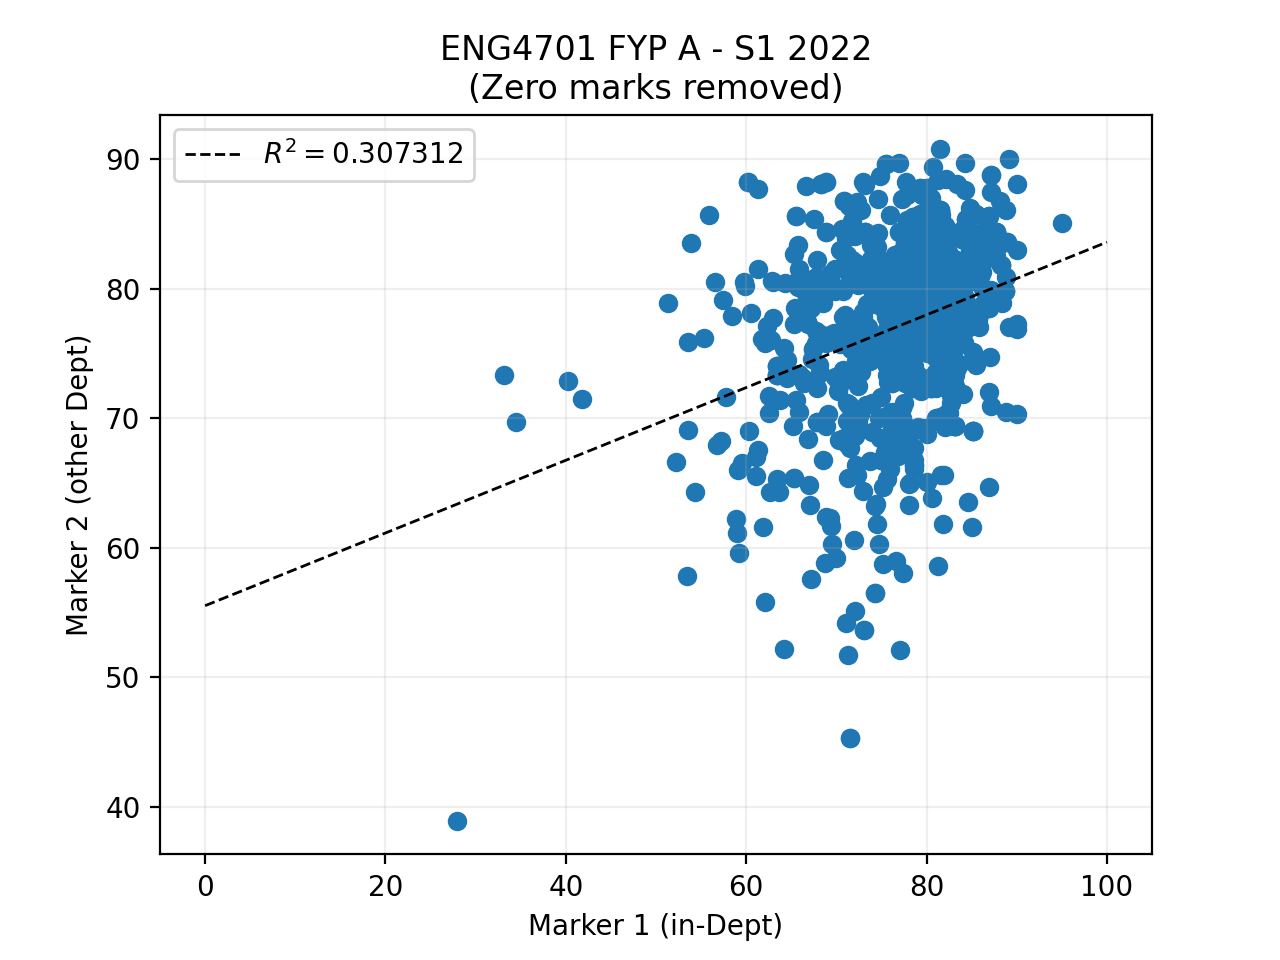

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
ax.scatter(A[fltc,1],A[fltc,2])
ax.plot(xc,yc,ls='--',c='k',lw=1,label='$R^2 = %f$' % rc)
plt.xlabel('Marker 1 (in-Dept)')
plt.ylabel('Marker 2 (other Dept)')
plt.title("ENG4701 FYP A - S1 2022\n(Zero marks removed)")
plt.legend()
#plt.savefig("/Users/dduke/Desktop/ENG4701b.png")
plt.show();

## ENG4702 analysis

In [8]:
# ENG4702 STATS.
flt2=(A[:,5]>0)&(A[:,6]>0)
slope, intercept, r2, p, se = scipy.stats.linregress( A[flt2,5], A[flt2,6] )
x2 = np.linspace(np.nanmin(A[flt,5]),np.nanmax(A[flt,5]),10)
y2 = slope*x + intercept

<IPython.core.display.Javascript object>


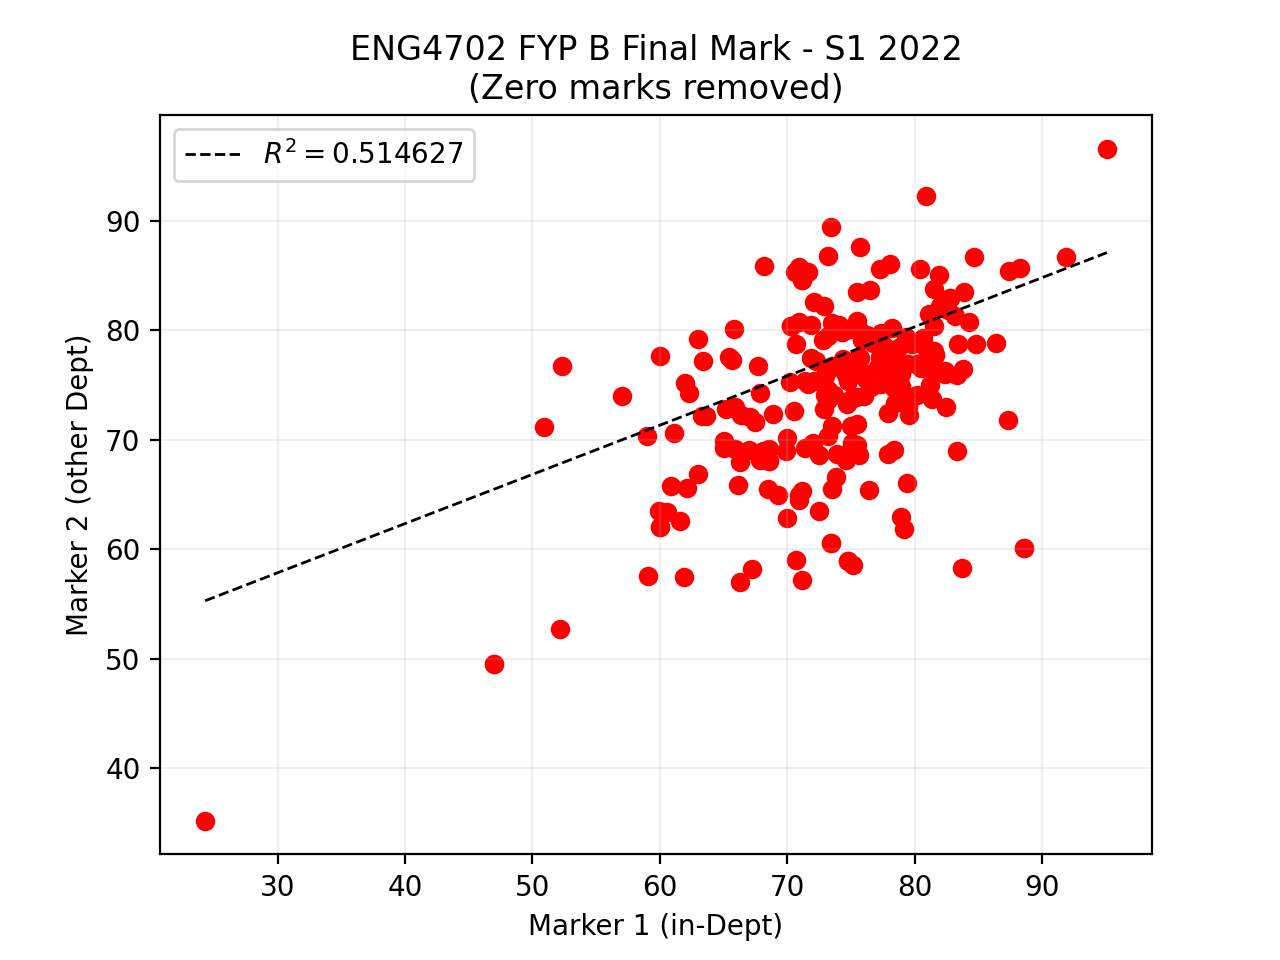

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
ax.scatter(A[flt,5],A[flt,6],label=None,c='r')
ax.plot(x2,y2,ls='--',c='k',lw=1,label='$R^2 = %f$' % r2)
plt.xlabel('Marker 1 (in-Dept)')
plt.ylabel('Marker 2 (other Dept)')
plt.title("ENG4702 FYP B Final Mark - S1 2022\n(Zero marks removed)")
plt.legend();
#plt.savefig("/Users/dduke/Desktop/ENG4702.png")
plt.show();

## Per-department analysis

<IPython.core.display.Javascript object>


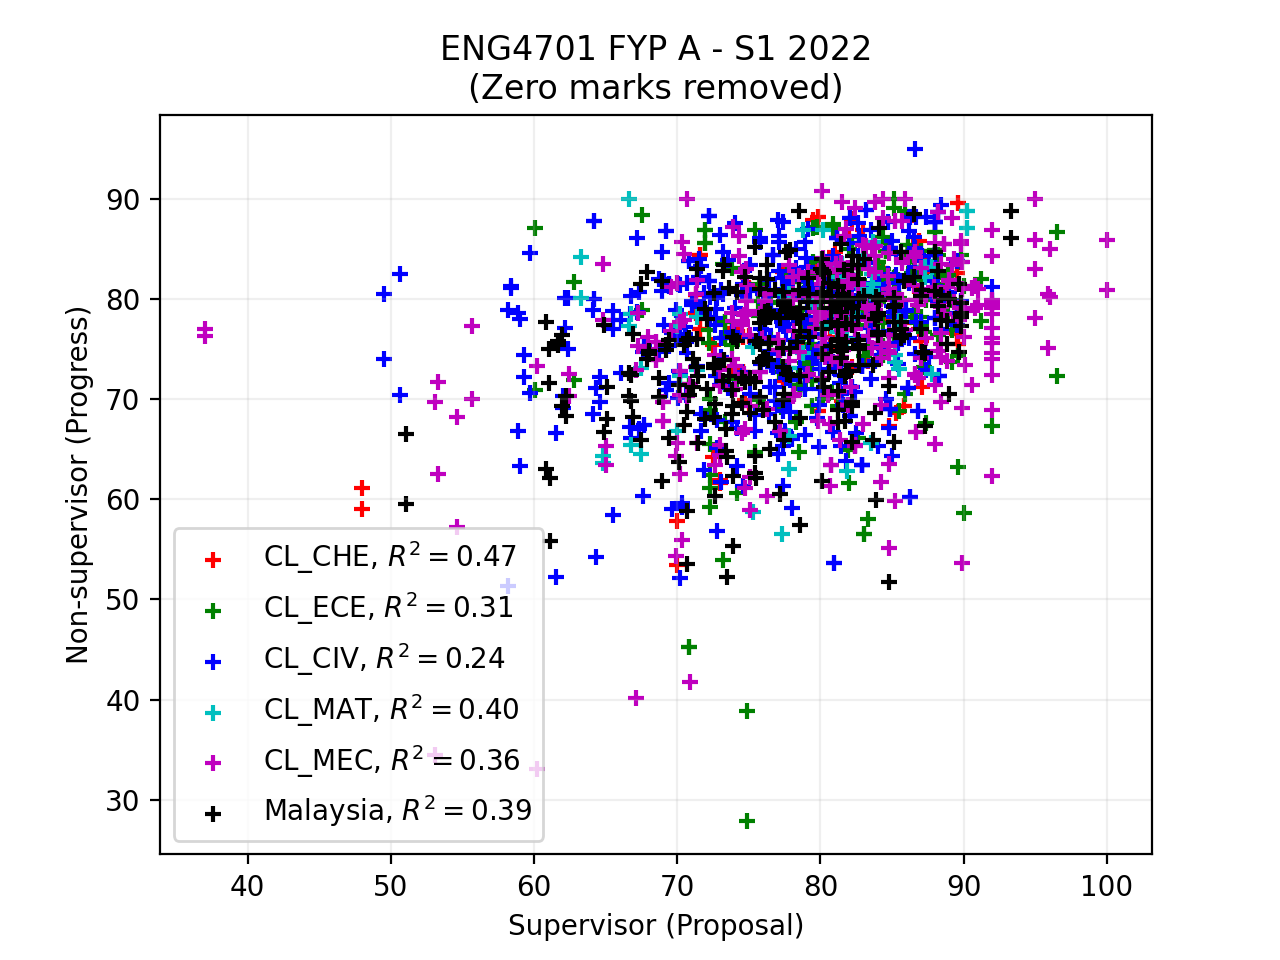

<IPython.core.display.Javascript object>


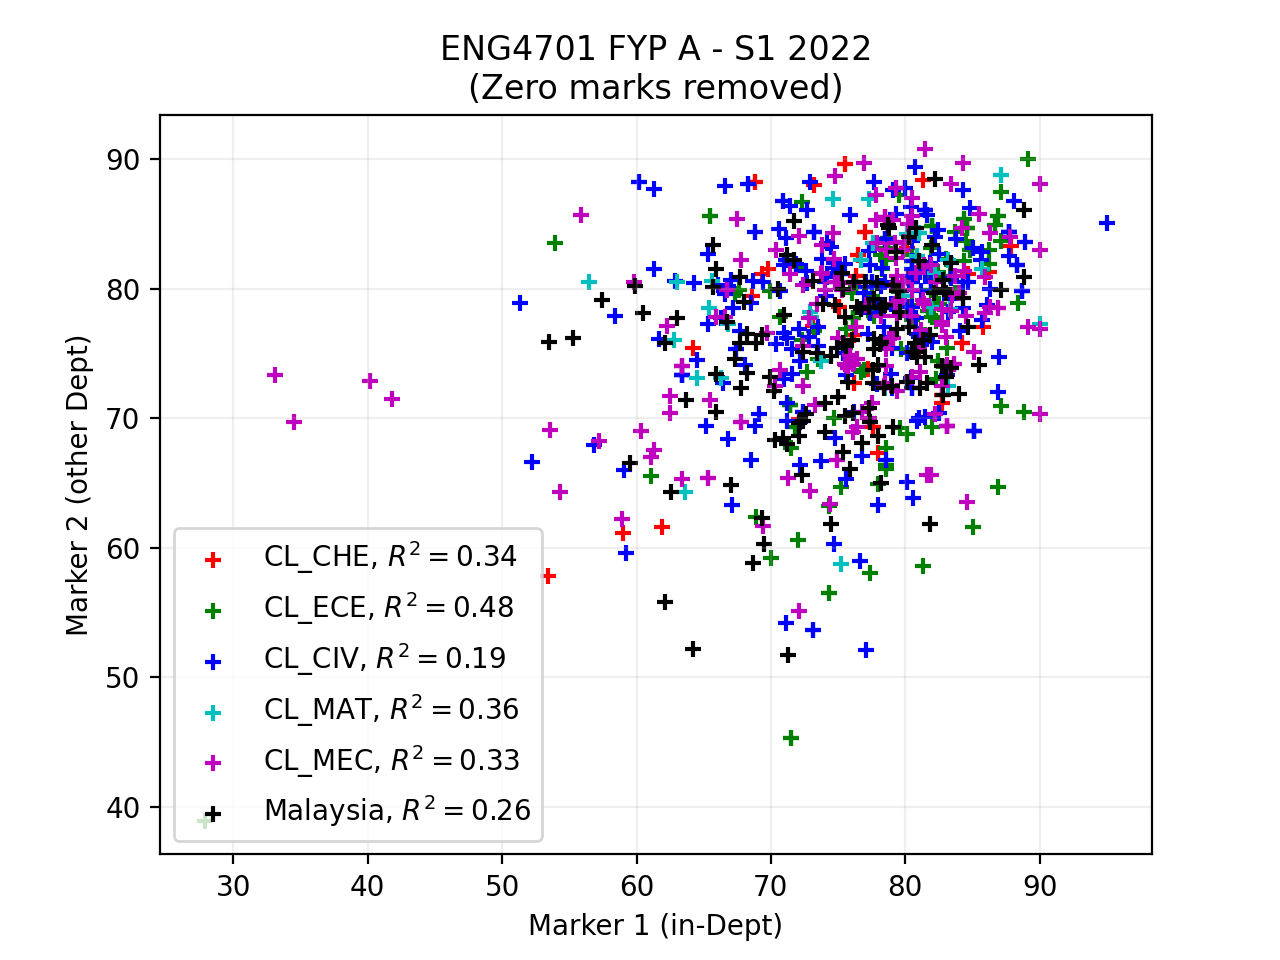

<IPython.core.display.Javascript object>


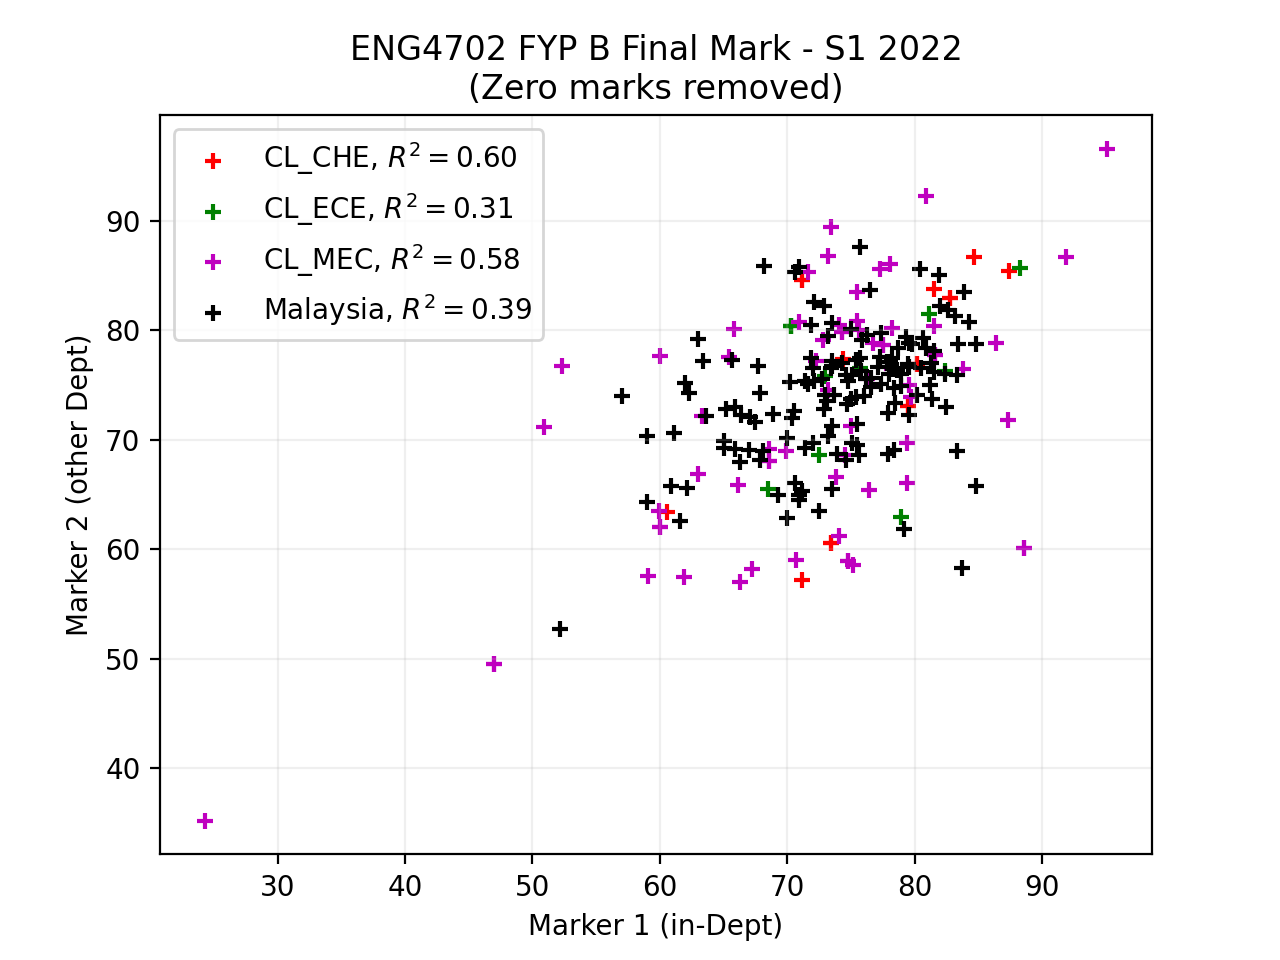

In [10]:
# 0 = CL_CHE
# 1 = CL_ECE
# 2 = CL_CIV
# 3 = CL_MAT
# 4 = CL_MEC
# 5 = MA_CHE
# 6 = MA_CIV
# 7 = MA_ECE
# 8 = MA_MEC
# 9 = MA_TRC

Depts = ['CL_CHE','CL_ECE','CL_CIV','CL_MAT','CL_MEC','Malaysia']
cList = ['r','g','b','c','m','k','y']

fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
i=0
for D in Depts:
    if i<5: df = A[:,4]==i
    else: df = A[:,4]>=5
    datax = np.hstack((A[flt&df,0],A[flt&df,0]))
    datay = np.hstack((A[flt&df,1],A[flt&df,2]))
    if len(datax)>0:
        slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(datax),np.nan_to_num(datay))
        ax.scatter(datax,datay,label=Depts[i]+', $R^2=$%.2f' % r,c=cList[i],marker='+')
    i+=1
plt.xlabel('Supervisor (Proposal)')
plt.ylabel('Non-supervisor (Progress)')
plt.title("ENG4701 FYP A - S1 2022\n(Zero marks removed)")
plt.legend()
plt.savefig("/Users/dduke/Desktop/ENG4701c.png")


fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
i=0
for D in Depts:
    if i<5: df = A[:,4]==i
    else: df = A[:,4]>=5
    datax=A[flt&df,1]
    datay=A[flt&df,2]
    if len(datax)>0:
        slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(datax),np.nan_to_num(datay))
        ax.scatter(datax,datay,label=Depts[i]+', $R^2=$%.2f' % r,c=cList[i],marker='+')
    i+=1
plt.xlabel('Marker 1 (in-Dept)')
plt.ylabel('Marker 2 (other Dept)')
plt.title("ENG4701 FYP A - S1 2022\n(Zero marks removed)")
plt.legend()
plt.savefig("/Users/dduke/Desktop/ENG4701d.png")


fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
i=0
for D in Depts:
    if i<5: df = A[:,8]==i
    else: df = A[:,8]>=5
    datax = A[flt2&df,5]
    datay = A[flt2&df,6]
    if len(datax)>0:
        slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(datax),np.nan_to_num(datay))
        ax.scatter(datax,datay,label=Depts[i]+', $R^2=$%.2f' % r,c=cList[i],marker='+')
    i+=1
plt.xlabel('Marker 1 (in-Dept)')
plt.ylabel('Marker 2 (other Dept)')
plt.title("ENG4702 FYP B Final Mark - S1 2022\n(Zero marks removed)")
plt.legend()
plt.savefig("/Users/dduke/Desktop/ENG4702b.png")


plt.show();




# WAM correlation
14/7/22, D. Duke

Data shape: (1039, 13)


<IPython.core.display.Javascript object>


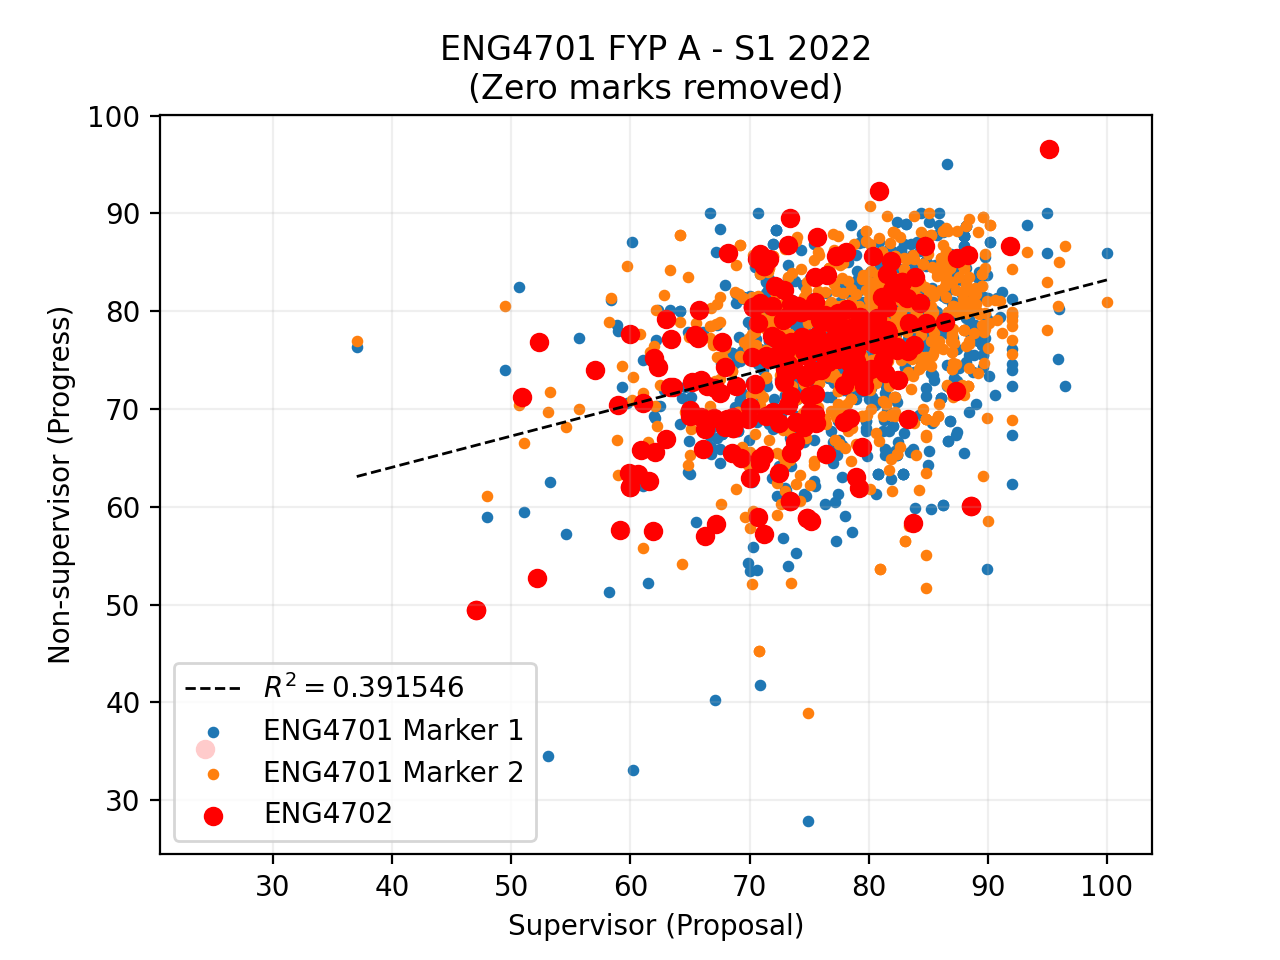

In [11]:
B=np.genfromtxt("ENG4701 2022 S1 WAMData.csv",skip_header=1,delimiter=',')
print("Data shape: "+str(B.shape))

fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
ax.scatter(A[flt,0],A[flt,1],label='ENG4701 Marker 1',s=10)
ax.scatter(A[flt,0],A[flt,2],label='ENG4701 Marker 2',s=10)
ax.scatter(A[flt,5],A[flt,6],label='ENG4702',c='r')
ax.plot(x,y,ls='--',c='k',lw=1,label='$R^2 = %f$' % r)
plt.xlabel('Supervisor (Proposal)')
plt.ylabel('Non-supervisor (Progress)')
plt.title("ENG4701 FYP A - S1 2022\n(Zero marks removed)")
plt.legend()
#plt.savefig("/Users/dduke/Desktop/ENG4701.png")
plt.show();

0.6380766582244232 28.789293314466228 0.6346954596573962 27.681884048622223
ENG4701: cross over at WAM = 79.545279
ENG4702: cross over at WAM = 75.777553


<IPython.core.display.Javascript object>


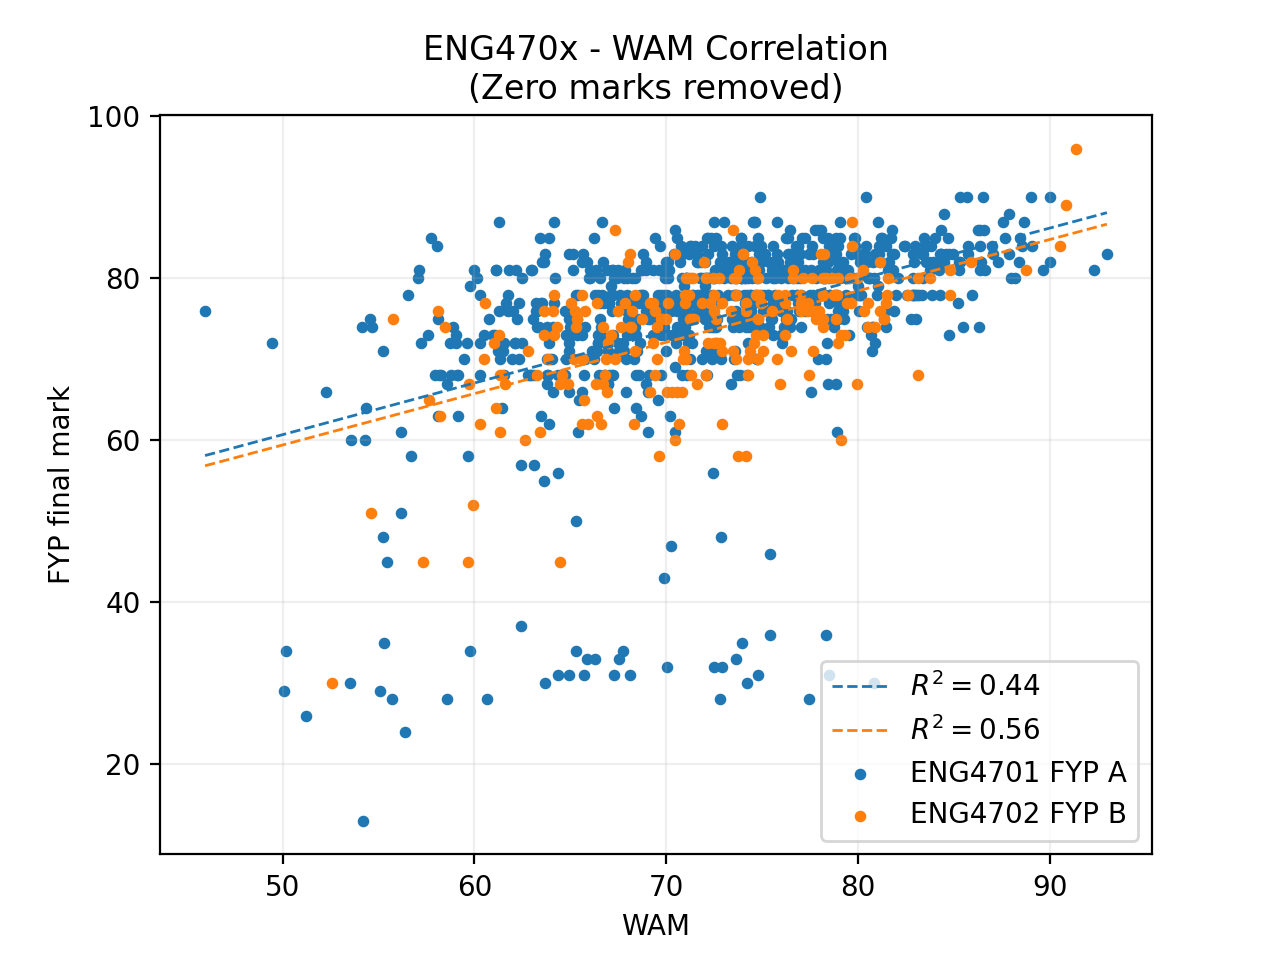

In [12]:
flta=B[:,4]>0
fltb=B[:,10]>0

slopea, intercepta, ra, p, se = scipy.stats.linregress(np.nan_to_num(B[flta,6]),np.nan_to_num(B[flta,4]))
slopeb, interceptb, rb, p, se = scipy.stats.linregress(np.nan_to_num(B[fltb,11]),np.nan_to_num(B[fltb,10]))
x_ = np.linspace(np.nanmin(B[:,6]),np.nanmax(B[:,6]),10)
print(slopea,intercepta,slopeb,interceptb)
print("ENG4701: cross over at WAM = %f" % (intercepta/(1-slopea)))
print("ENG4702: cross over at WAM = %f" % (interceptb/(1-slopeb)))

fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
ax.scatter(B[flta,6],B[flta,4],label='ENG4701 FYP A',s=10)
ax.scatter(B[fltb,11],B[fltb,10],label='ENG4702 FYP B',s=10)
ax.plot(x_,x_*slopea + intercepta,ls='--',lw=1,label='$R^2 = %.2f$' % ra)
ax.plot(x_,x_*slopeb + interceptb,ls='--',lw=1,label='$R^2 = %.2f$' % rb)
plt.xlabel('WAM')
plt.ylabel('FYP final mark')
#plt.xlim(45,100)
#plt.ylim(45,100)
plt.title("ENG470x - WAM Correlation\n(Zero marks removed)")
plt.legend()
plt.savefig("/Users/dduke/Desktop/ENG470x-WAM.png")
plt.show();

# Correlation breakdown by assessment
D. Duke 16/07/22

In [13]:
C=np.genfromtxt("ENG4701 2022 S1 WAMData2.csv",skip_header=1,delimiter=',')
print("Data shape: "+str(C.shape))

Data shape: (189, 12)


In [14]:
labels=['ENG4701 Prop. (Sup)','ENG4701 Prog. (Mkr 1)','ENG4701 Prog. (Mkr 2)',\
        None,None,'ENG4702 Marker 1 ', 'ENG4702 Marker 2 ']
j=[4,4,4,11,11,11,11]
for i in (0,1,2,5,6):
    f=~np.isnan(C[:,j[i]]) & (C[:,j[i]]>0) & ~np.isnan(C[:,i]) & (C[:,i]>0)
    slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(C[f,j[i]]),np.nan_to_num(C[f,i]))
    print('%s:\t%.2f WAM%+.2f, R2 = %.2f, Crossover = %.1f' % (labels[i],slope,intercept,r,intercept/(1-slope)))
    labels[i] += ' R$^2$=%.2f' % r


ENG4701 Prop. (Sup):	0.46 WAM+46.80, R2 = 0.44, Crossover = 86.0
ENG4701 Prog. (Mkr 1):	0.50 WAM+38.90, R2 = 0.43, Crossover = 77.0
ENG4701 Prog. (Mkr 2):	0.31 WAM+53.92, R2 = 0.38, Crossover = 78.0
ENG4702 Marker 1 :	0.74 WAM+19.54, R2 = 0.53, Crossover = 74.7
ENG4702 Marker 2 :	0.85 WAM+11.75, R2 = 0.60, Crossover = 79.8


<IPython.core.display.Javascript object>


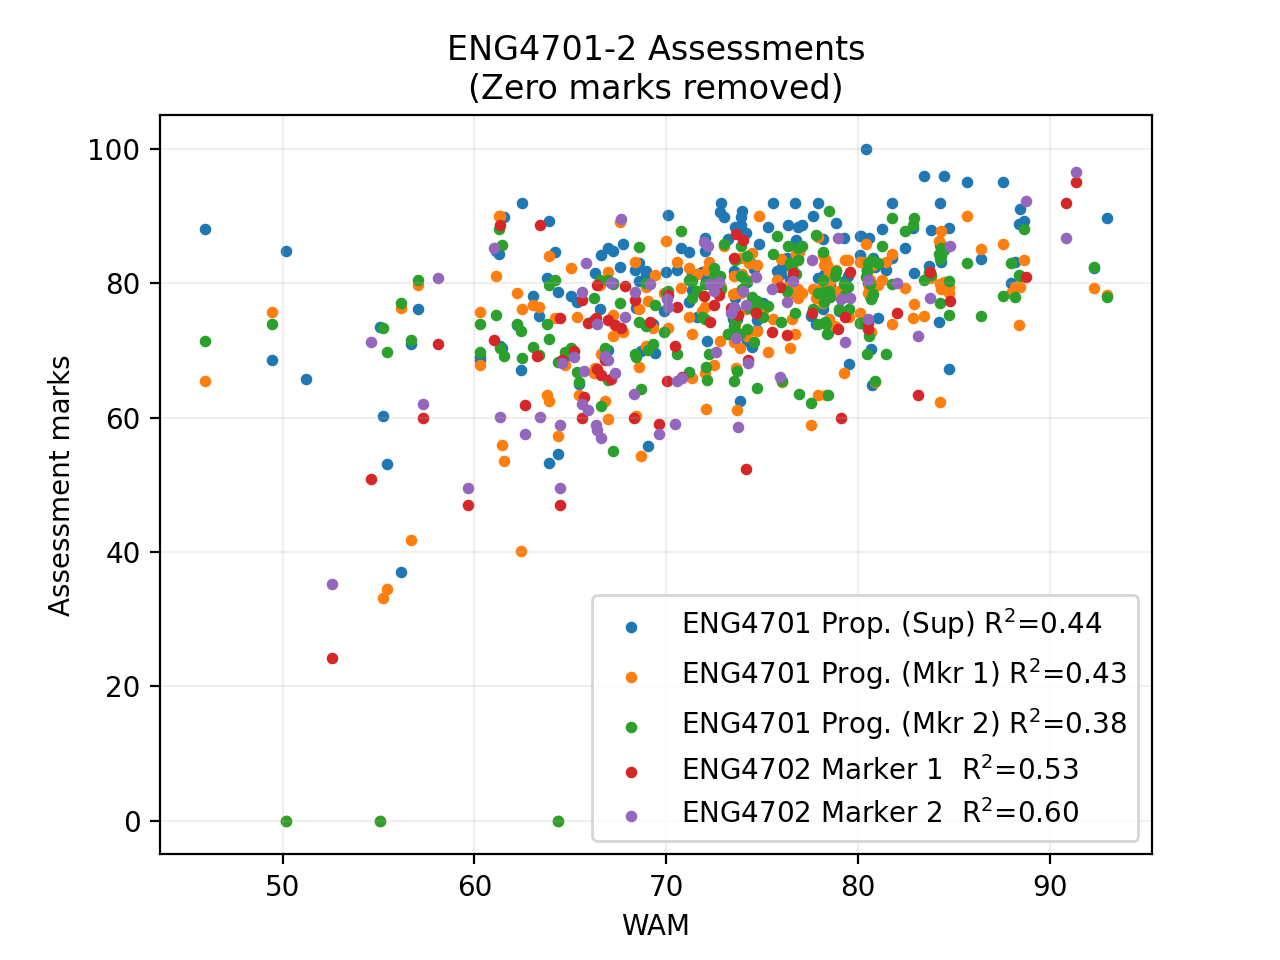

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
for i in (0,1,2,5,6):
    ax.scatter(C[:,j[i]],C[:,i],label=labels[i],s=10)
#plt.plot(np.arange(50,100,1),np.arange(50,100,1),c='k',ls='--')
plt.xlabel('WAM')
plt.ylabel('Assessment marks')
#plt.xlim(45,100)
#plt.ylim(45,100)
plt.title("ENG4701-2 Assessments\n(Zero marks removed)")
plt.legend()
#plt.savefig("/Users/dduke/Desktop/ENG470x-WAM2.png")
plt.show();

# Comparison to historical units
17/7/22, D. Duke

In [42]:
D=np.genfromtxt('MEC4401-TRC4000-S2_2021.csv',skip_header=1,delimiter=',')
print("Data shape: "+str(D.shape))
E=np.genfromtxt('MEC4402-TRC4001-S1_2021.csv',skip_header=1,delimiter=',')
print("Data shape: "+str(E.shape))

Data shape: (54, 2)
Data shape: (231, 3)


<IPython.core.display.Javascript object>


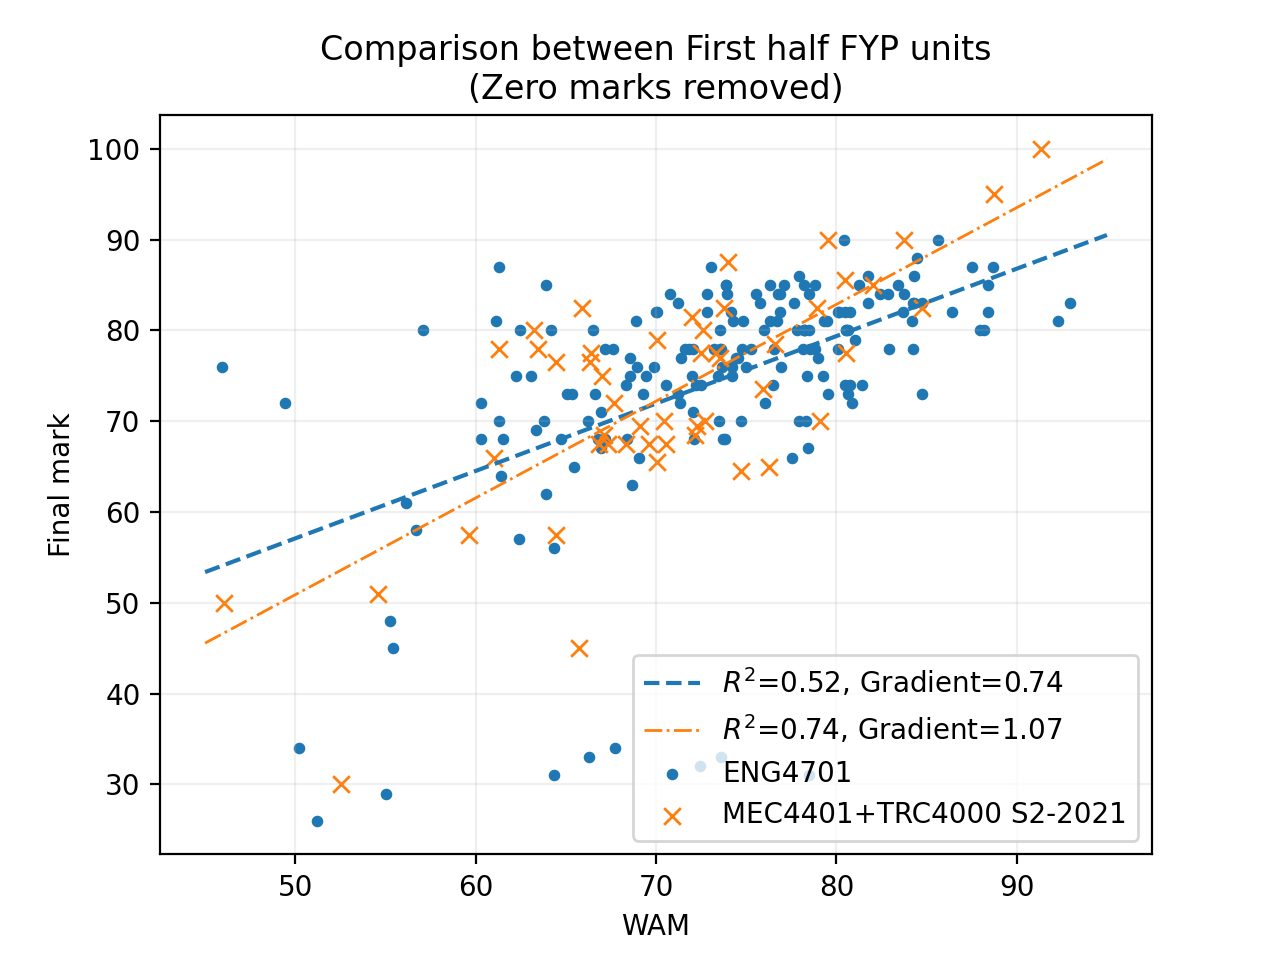

ENG4701:		0.74 WAM+19.98, R2 = 0.52, Crossover = 77.6
MEC4401+TRC4000:	1.07 WAM-2.39, R2 = 0.74, Crossover = 36.4


In [50]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
x=np.linspace(45,95,10)


f=(C[:,4]>0)&(C[:,3]>0)&(~np.isnan(C[:,3]))&(~np.isnan(C[:,3]))
ax.scatter(C[f,4],C[f,3],label='ENG4701',s=10)
slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(C[f,4]),np.nan_to_num(C[f,3]))
ax.plot(x,slope*x+intercept,label='$R^2$=%.2f, Gradient=%.2f' % (r,slope),ls='--')
print('ENG4701:\t\t%.2f WAM%+.2f, R2 = %.2f, Crossover = %.1f' % (slope,intercept,r,intercept/(1-slope)))

f=(D[:,0]>0)&(D[:,1]>0)&(~np.isnan(D[:,0]))&(~np.isnan(D[:,1]))
ax.scatter(D[f,0],D[f,1],label='MEC4401+TRC4000 S2-2021',marker='x',lw=1)
slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(D[f,0]),np.nan_to_num(D[f,1]))
ax.plot(x,slope*x+intercept,label='$R^2$=%.2f, Gradient=%.2f' % (r,slope),ls='-.',lw=1)
print('MEC4401+TRC4000:\t%.2f WAM%+.2f, R2 = %.2f, Crossover = %.1f' % (slope,intercept,r,intercept/(1-slope)))


plt.xlabel('WAM')
plt.ylabel('Final mark')
plt.title("Comparison between First half FYP units\n(Zero marks removed)")
plt.legend()
#plt.savefig("/Users/dduke/Desktop/ENG470x-WAM3.png")
plt.show();


<IPython.core.display.Javascript object>


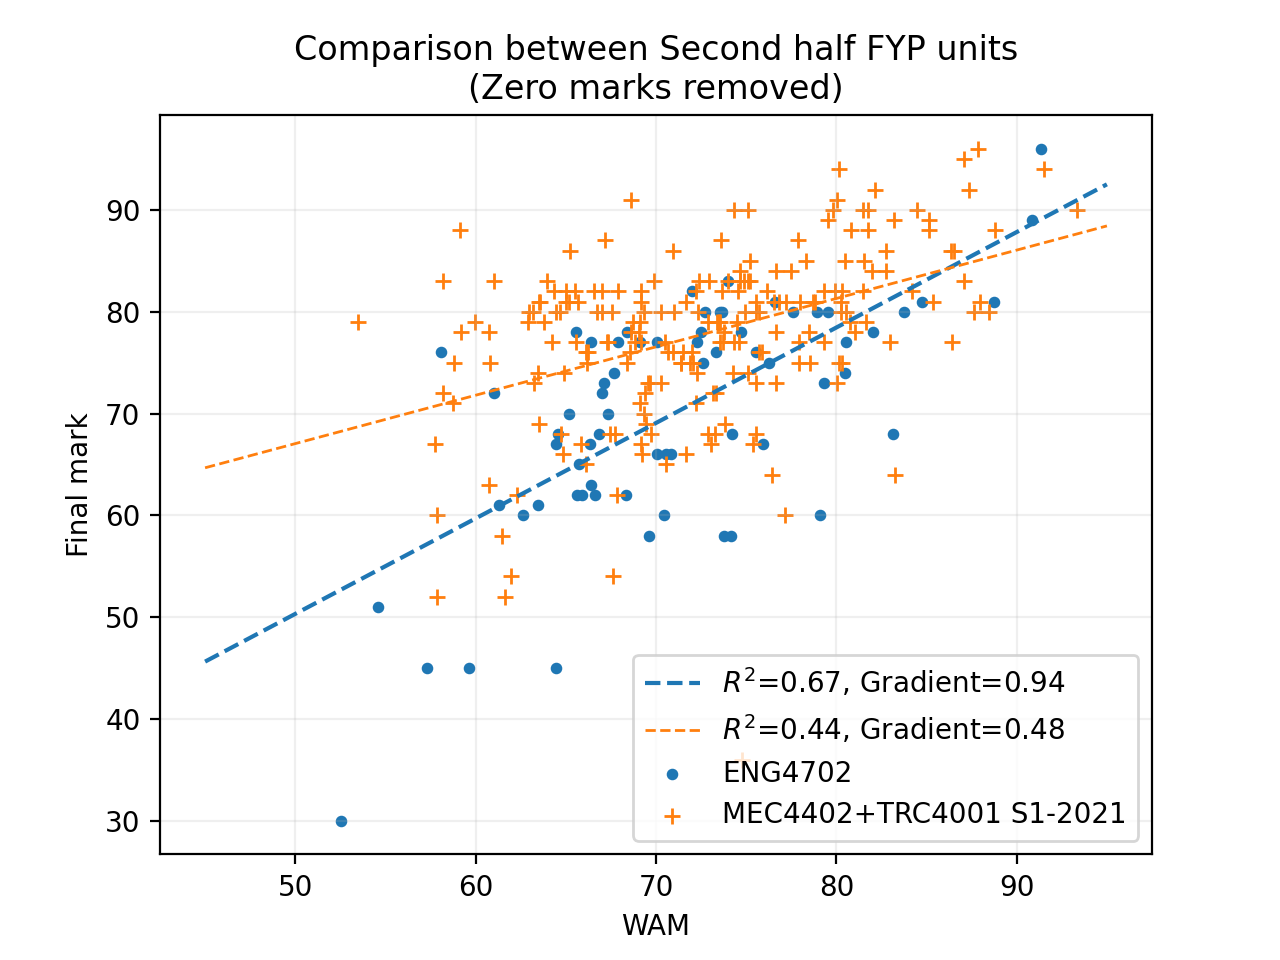

ENG4702:		0.94 WAM+3.45, R2 = 0.67, Crossover = 55.2
MEC4402+TRC4001:	0.48 WAM+43.29, R2 = 0.44, Crossover = 82.5


In [51]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
x=np.linspace(45,95,10)


f=(C[:,11]>0)&(C[:,10]>0)&(~np.isnan(C[:,11]))&(~np.isnan(C[:,10]))
ax.scatter(C[f,11],C[f,10],label='ENG4702',s=10)
slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(C[f,11]),np.nan_to_num(C[f,10]))
ax.plot(x,slope*x+intercept,label='$R^2$=%.2f, Gradient=%.2f' % (r,slope),ls='--')
print('ENG4702:\t\t%.2f WAM%+.2f, R2 = %.2f, Crossover = %.1f' % (slope,intercept,r,intercept/(1-slope)))

f=(E[:,1]>0)&(E[:,2]>0)&(~np.isnan(E[:,1]))&(~np.isnan(E[:,2]))
ax.scatter(E[f,2],E[f,1],label='MEC4402+TRC4001 S1-2021',marker='+',lw=1)
slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(E[f,2]),np.nan_to_num(E[f,1]))
ax.plot(x,slope*x+intercept,label='$R^2$=%.2f, Gradient=%.2f' % (r,slope),ls='--',lw=1)
print('MEC4402+TRC4001:\t%.2f WAM%+.2f, R2 = %.2f, Crossover = %.1f' % (slope,intercept,r,intercept/(1-slope)))


plt.xlabel('WAM')
plt.ylabel('Final mark')
plt.title("Comparison between Second half FYP units\n(Zero marks removed)")
plt.legend()
#plt.savefig("/Users/dduke/Desktop/ENG470x-WAM3.png")
plt.show();

